
KELOMPOK 4:

GAGAH AJI GUNADI - 1301204093

MOCHAMAD IKHSAN NURDIANSYAH - 1301204071

MOOCHAMMAD ATHIAN GIFARI - 1301204367

MUHAMMAD NAUFAL ZAIDAN - 1301204338




Tipe tugas dari NIM terkecil lalu di modulo

In [ ]:
print(1301204071 % 4)

3


Maka Tugas kami akan mengerjakan tugas tipe 3 yaitu tugas klasifikasi pada dataset
German credit menggunakan metode boosting. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

### PRE-PROCESSING DATA

READ DATA

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aggagah/ML-ProjectBased-Dataset--German-Credit/master/german_credit.csv", sep=";")
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [ ]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good


In [ ]:
df.info

<bound method DataFrame.info of                                          status  duration  \
0                           no checking account        18   
1                           no checking account         9   
2                                    ... < 0 DM        12   
3                           no checking account        12   
4                           no checking account        12   
..                                          ...       ...   
995                         no checking account        24   
996                         no checking account        24   
997  ... >= 200 DM / salary for at least 1 year        21   
998                                  ... < 0 DM        12   
999                         no checking account        30   

                                  credit_history              purpose  amount  \
0        all credits at this bank paid back duly           car (used)    1049   
1        all credits at this bank paid back duly               others    

cek unique value pada setiap fitur, jika hanya punya 1, maka drop saja karena tidak akan memberi pengaruh signifikan terhadap model yang akan dibuat

In [ ]:
for col in df.columns:
    print('Total unique value of feature', col, 'is', len(df[col].unique()))

Total unique value of feature status is 4
Total unique value of feature duration is 33
Total unique value of feature credit_history is 5
Total unique value of feature purpose is 10
Total unique value of feature amount is 923
Total unique value of feature savings is 5
Total unique value of feature employment_duration is 5
Total unique value of feature installment_rate is 4
Total unique value of feature personal_status_sex is 4
Total unique value of feature other_debtors is 3
Total unique value of feature present_residence is 4
Total unique value of feature property is 4
Total unique value of feature age is 53
Total unique value of feature other_installment_plans is 3
Total unique value of feature housing is 3
Total unique value of feature number_credits is 4
Total unique value of feature job is 4
Total unique value of feature people_liable is 2
Total unique value of feature telephone is 2
Total unique value of feature foreign_worker is 2
Total unique value of feature credit_risk is 2


Encode jadi numerical data, bukan string

In [ ]:
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
    print(df[column])

0      3
1      3
2      0
3      3
4      3
      ..
995    3
996    3
997    1
998    0
999    3
Name: status, Length: 1000, dtype: int64
0      13
1       5
2       8
3       8
4       8
       ..
995    17
996    17
997    15
998     8
999    21
Name: duration, Length: 1000, dtype: int64
0      0
1      0
2      4
3      0
4      0
      ..
995    4
996    4
997    0
998    4
999    4
Name: credit_history, Length: 1000, dtype: int64
0      2
1      5
2      8
3      5
4      5
      ..
995    4
996    5
997    5
998    4
999    2
Name: purpose, Length: 1000, dtype: int64
0      116
1      528
2       72
3      398
4      411
      ... 
995    375
996    438
997    907
998    799
999    793
Name: amount, Length: 1000, dtype: int64
0      4
1      4
2      0
3      4
4      4
      ..
995    4
996    4
997    1
998    1
999    1
Name: savings, Length: 1000, dtype: int64
0      2
1      0
2      1
3      0
4      0
      ..
995    0
996    3
997    3
998    4
999    3
Name: employment

split data

In [ ]:
X = df.loc[:, df.columns != 'credit_risk']
Y = df['credit_risk']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 100)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ALGORITMA UTAMA

Menggunakan adaboost dengan base classifier yaitu Decision Tree

In [ ]:
# AdaBoost Classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

# parameter grid
gridParam = {'base_estimator__max_depth': [1, 2, 3, 4],
              'n_estimators': [50, 100, 200, 300]}

# Create the grid search object
gridSearch = GridSearchCV(estimator=clf, param_grid=gridParam, cv=5)

# Fit the grid search object to the training data
gridSearch.fit(X_train, Y_train)

# Get the best estimator
bestClassifier = gridSearch.best_estimator_

# Test the classifier
accuracy = bestClassifier.score(X_test, Y_test)

print('Accuracy: {}'.format(accuracy))

Accuracy: 0.7025


Hasil klasifikasi dengan model yang telah dibuat
1 = good
0 = bad

In [ ]:
predictedResult = bestClassifier.predict(X_test)
predictedResult

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,

Format hasil ke dalam good dan bad ( good = 1, bad = 0)

In [ ]:
results = np.where(predictedResult == 1, 'good', 'bad')
results

array(['good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good',

probabilitas prediksi antara bad dan good

In [ ]:
predictedProbabilities = bestClassifier.predict_proba(X_test)
predictedProbabilities

array([[0.30982984, 0.69017016],
       [0.26735598, 0.73264402],
       [0.1321518 , 0.8678482 ],
       [0.17026567, 0.82973433],
       [0.33513172, 0.66486828],
       [0.35452966, 0.64547034],
       [0.70251973, 0.29748027],
       [0.29031376, 0.70968624],
       [0.53845763, 0.46154237],
       [0.39255658, 0.60744342],
       [0.76444658, 0.23555342],
       [0.36307161, 0.63692839],
       [0.23307522, 0.76692478],
       [0.2400582 , 0.7599418 ],
       [0.18240888, 0.81759112],
       [0.4163919 , 0.5836081 ],
       [0.62724774, 0.37275226],
       [0.71812396, 0.28187604],
       [0.199881  , 0.800119  ],
       [0.54805317, 0.45194683],
       [0.10644982, 0.89355018],
       [0.15675014, 0.84324986],
       [0.11870025, 0.88129975],
       [0.41905133, 0.58094867],
       [0.45060645, 0.54939355],
       [0.20872144, 0.79127856],
       [0.30253417, 0.69746583],
       [0.39097133, 0.60902867],
       [0.34099434, 0.65900566],
       [0.73650672, 0.26349328],
       [0.

### EVALUASI

In [ ]:
# accuracy
print(f"Accuracy : {accuracy_score(Y_test, predictedResult)}")

# precision
print(f"Precision : {precision_score(Y_test, predictedResult)}")

# recall
print(f"Recall : {recall_score(Y_test, predictedResult)}")

# f1 score
print(f"F1 Score : {f1_score(Y_test, predictedResult)}")



Accuracy : 0.7025
Precision : 0.7920792079207921
Recall : 0.8108108108108109
F1 Score : 0.8013355592654425


### VISUALISASI

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


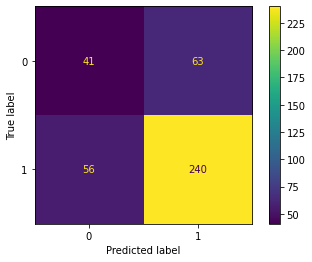

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


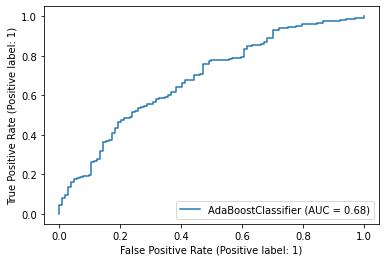

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(bestClassifier, X_test, Y_test)
plt.show()

# Plot the ROC curve
plot_roc_curve(bestClassifier, X_test, Y_test)
plt.show()